<H2>Prevendo se determinada pessoa irá comprar seguro de vida baseado na idade dela</H2>
<H3> Modelo utilizado: Regressão Logística</H3>

OBS:
<ul>
<li>0: Não compra o seguro</li>
<li>1: Compra o seguro</li>
</ul>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
dataset = pd.read_csv("C:/Users/PICHAU/PycharmProjects/Udemy/Arquivos/insurance_data.csv", ",")
dataset.head()

In [ ]:
#Scatter plot dos dados.
plt.scatter(dataset['age'], dataset['bought_insurance'], marker = 'o', color = 'green')


In [ ]:
#Boxplot das idades.
df = pd.DataFrame(dataset, columns=['age'])
boxplot = df.boxplot(column= ['age'])

In [ ]:
#Definindo as variáveis.
X = dataset['age'].values
y = dataset['bought_insurance'].values
X = X.reshape(-1, 1)


In [159]:
#Separando as váriaveis em 'train' e 'test'. Valor de 20% para testar o modelo e uma seed para sempre gerar valores iguais.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [160]:
modelo = LogisticRegression().fit(X_train, y_train)

C:\Users\PICHAU\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


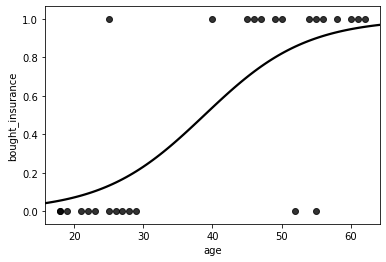

In [161]:
#Fazendo o gráfico da regressão logística com a curva sigmóide.
sns.regplot(x = 'age', y = 'bought_insurance', data = dataset, logistic=True, color = 'black')

>Formula da curva sigmóide:
$ f(x) = 1 / 1 + e^-x $ 


In [162]:
#Fazendo a previsão.
previsao = modelo.predict(X_test)
previsao

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [163]:
#Como temos poucos dados, o score deu 1.
score = accuracy_score(previsao, y_test)
score

1.0

In [164]:
#Mostrando a probabilidade de comprar ou não o seguro.
previsao_proba = modelo.predict_proba(X_test)
previsao_proba

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [165]:
X_test

array([[60],
       [56],
       [19],
       [26],
       [28],
       [25]], dtype=int64)

> Pode-se perceber que quanto maior a idade, maior a probabilidade de a pessoa comprar o seguro.

In [178]:
#Função para facilitar as previsões
from math import exp

def sigmoide(x):
    return 1 / (1 + exp(-x))

def prever_idade(idade):
    b0 = modelo.intercept_[0]
    b1 = modelo.coef_[0][0]
    x = idade * b1 + b0
    y = sigmoide(x)
    return y

In [179]:
prever_idade(43)

0.6562574323974232